In [31]:
from math import floor
import numpy as np
import pandas as pd
import seaborn as sns
import copy

In [120]:
columns = {'arch':0,'silhouette':1, 'homogeneity':2, 'clusters':0, 'alghorithm':0}

alfa_columns = ['arch', 'alghorithm']
percentual_columns = ['homogeneity']
numbered_columns = ['silhouette', 'clusters']

fontsize_xylabel = 18
fontsize_tick = 18

In [96]:
'''
NOTE THAT THE "NORMAL 2" PATTERN COULD BE OUT OF PATTERN. REQUIRED 2 LINES as 2x2 array. IF THIS HAPPENED, MUST BE MANUALLY CONVERTED TO THE REQUIRED PATTERN AS BELOW!

REQUIRED
[[1. 0.]
 [0. 0.]]

OUT OF PATTERN
[[1.]]
'''

with open('./outputs/output_kmeans_batch_ds_dr_2-ts_0.8-lf_1-limit_500-wl_1.txt') as f:
#with open('./outputs/output_kmeans_batch_pca095_dr_2-ts_0.8-lf_1-limit_500-wl_1.txt') as f:
#with open('./outputs/output_kmeans_batch_pca099_dr_2-ts_0.8-lf_1-limit_500-wl_1.txt') as f:
    lines = f.readlines()

height = 3
times = floor(len(lines)/height)

output = pd.DataFrame(np.zeros((times, len(columns))), columns=columns)

for k, column_name in enumerate(columns):
    column_init_position = columns[column_name]

    for time in np.arange(0, times):
        line_number = column_init_position+(time*height)
        value = lines[line_number].rstrip("\n")

        if (column_name in alfa_columns):
            if (column_name == 'alghorithm'):
                value = value.split()[-1:]
            else:
                value = " ".join(value.split()[3:-3])
        elif (column_name in percentual_columns):
            value = float(value)*100
        elif (column_name in numbered_columns):
            if (column_name == 'clusters'):
                value = value.split()[-2:-1]
            else:
                value = float(value)

        output.iloc[time,k] = value

f.close()

In [97]:
grouped = output.groupby(['clusters', 'alghorithm'])

homogeneity = []
silhouette = []
keys = []
for g in grouped.groups.keys():
    silhouette.append(grouped.get_group(g)['silhouette'].to_list())
    homogeneity.append(grouped.get_group(g)['homogeneity'].to_list())

    keys.append(g)

In [92]:
silhouette_99 = copy.deepcopy(silhouette)
homogeneity_99 = copy.deepcopy(homogeneity)
keys_99 = []
for t in keys:
    e = list(t)
    e.append(99)
    keys_99.append(e)
keys_99 = tuple(keys_99)

In [95]:
silhouette_95 = copy.deepcopy(silhouette)
homogeneity_95 = copy.deepcopy(homogeneity)
keys_95 = []
for t in keys:
    e = list(t)
    e.append(95)
    keys_95.append(e)
keys_95 = tuple(keys_95)

In [98]:
silhouette_without = copy.deepcopy(silhouette)
homogeneity_without = copy.deepcopy(homogeneity)
keys_without = []
for t in keys:
    e = list(t)
    e.append(0)
    keys_without.append(e)
keys_without = tuple(keys_without)

In [99]:
silhouette = silhouette_99 + silhouette_95 + silhouette_without
homogeneity = homogeneity_99 + homogeneity_95 + homogeneity_without
keys = keys_99 + keys_95 + keys_without

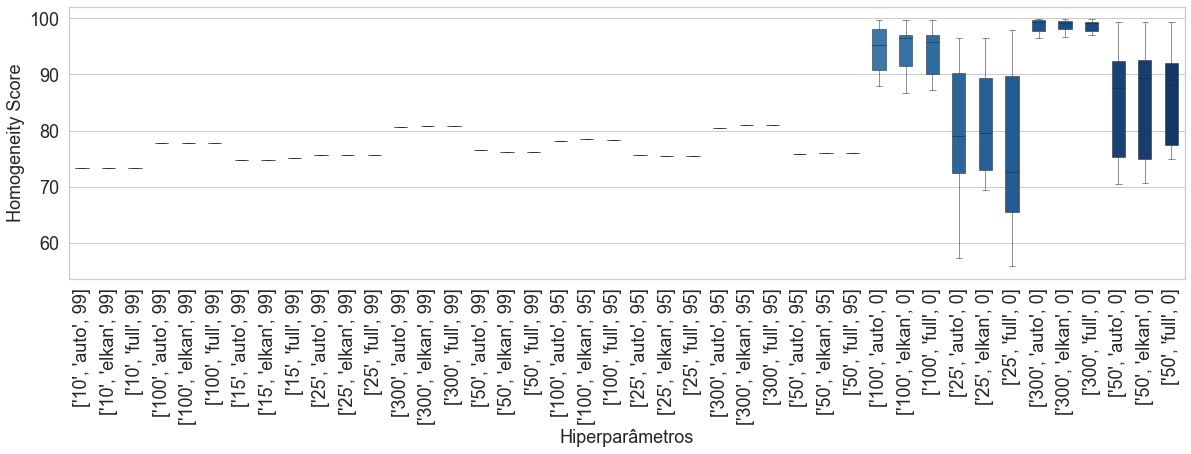

In [121]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
ax = sns.boxplot(data=homogeneity, palette='Blues', width=.5, linewidth = 0.5)
ax.set_xlabel("Hiperparâmetros",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
ax.set_xticklabels(keys, rotation=90)

fig = ax.get_figure()
fig.savefig("../charts/6_cluster_kmeans_hiperparametros_homogeneity_boxplot.pdf", bbox_inches='tight')

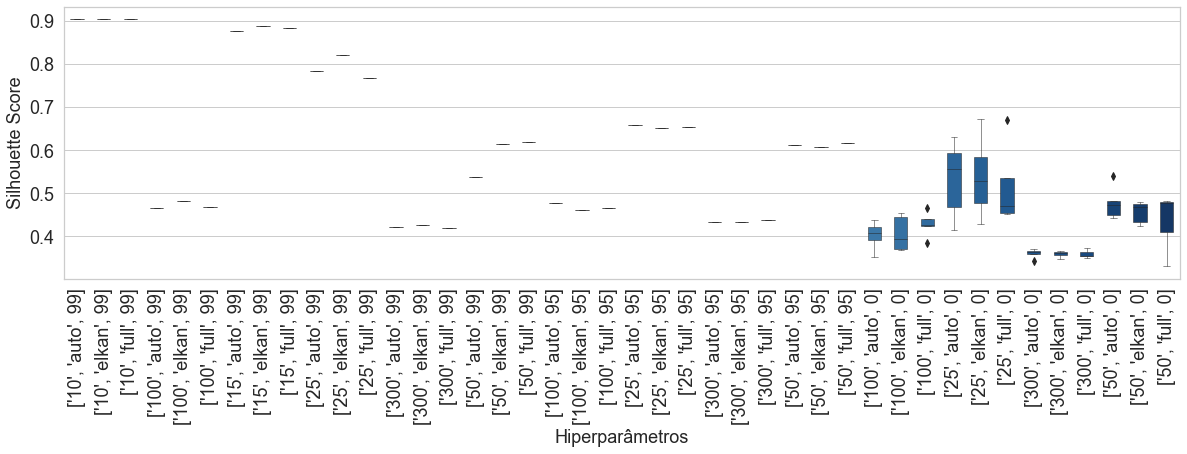

In [122]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
ax = sns.boxplot(data=silhouette, palette='Blues', width=.5, linewidth = 0.5)
ax.set_xlabel("Hiperparâmetros",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
ax.set_xticklabels(keys, rotation=90)

fig = ax.get_figure()
fig.savefig("../charts/6_cluster_kmeans_hiperparametros_silhouette_boxplot.pdf", bbox_inches='tight')